## Intro

This is initially a semi-guided project from [Code Academy](#https://www.codecademy.com/). I added some fun by implementing additional arguments to the plotting functions:  
* easily exclude (or not) outliers from histograms
* easily set the limit of scatter plots (i.e. manually "exclude" outliers, or "zoom")
* pass variable more flexibly than in the initial exercise

### **Import libraries**

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Part I - Time series**

### **Import data (1)**

In [2]:
wrc = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
src = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [3]:
wrc['Material'] = 'wood'
src['Material'] = 'Steel'

datasets = [wrc, src]
rc = pd.concat(datasets)

In [163]:
rc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 0 to 179
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          360 non-null    int64 
 1   Name          360 non-null    object
 2   Park          360 non-null    object
 3   Location      360 non-null    object
 4   Supplier      359 non-null    object
 5   Year Built    360 non-null    int64 
 6   Points        360 non-null    int64 
 7   Year of Rank  360 non-null    int64 
 8   Material      360 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.1+ KB


In [168]:
num_var = ['Rank', 'Year Built', 'Points', 'Year of Rank']
cat_var = ['Name', 'Park', 'Location', 'Supplier', 'Material']

In [169]:
rc[num_var].describe()

,Rank,Year Built,Points,Year of Rank
count,360.000000,360.000000,360.000000,360.000000
mean,22.127778,1999.552778,358.911111,2016.500000
std,15.180632,19.127559,335.865826,1.386364
min,1.000000,1914.000000,59.000000,2013.000000
25%,8.000000,1998.000000,117.000000,2016.000000
50%,20.500000,2006.000000,220.500000,2017.000000
75%,35.250000,2011.250000,485.250000,2018.000000
max,50.000000,2018.000000,1625.000000,2018.000000


In [170]:
rc[cat_var].describe()

,Name,Park,Location,Supplier,Material
count,360,360,360,359,360
unique,123,76,75,45,2
top,Goliath,Cedar Point,"Sandusky, Ohio",B&M,wood
freq,11,22,22,77,180


### **Function to plot ranking of a roller coaster over time**

In [4]:
def rank_evolution(df, name, park):
    # df = dataframe to use
    # name = name of the roller coaster
    # park = name of the park where the roller coaster is located
    
    # data for the roller coaster chart
    ranks = df['Rank'][(df['Name'] == name) & (df['Park'] == park)]
    years = df['Year of Rank'][(df['Name'] == name) & (df['Park'] == park)]
    
    # chart parameters
    xlenght = range(len(years))
    ylenght = np.sort(ranks.unique())
    title = 'Ranking evolution of {name}'.format(name=name)
    
    # plot chart
    ax = plt.subplot()
    plt.plot(xlenght, ranks, marker='o')
    ax.set_xticks(xlenght), ax.set_xticklabels(years)
    ax.set_yticks(ylenght), ax.invert_yaxis()
    plt.ylabel('Rank'), plt.xlabel('Year')
    plt.title(title)
    plt.show()

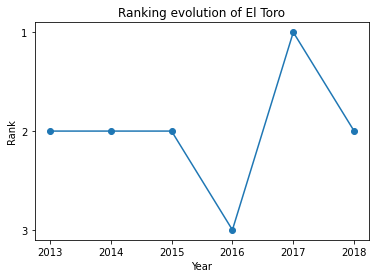

In [5]:
rank_evolution(rc, 'El Toro', 'Six Flags Great Adventure')

### **Function to compare the rankings of two roller coasters over time**

Challenge: some roller coasters share the same name (seen in EDA + first tests of the function). To overcome that and avoid messing with the visualization, I added the `Park` information inside the function to identify unique roller coasters.

In [6]:
def comp_two_rank_evolutions(df1, df2, name1, name2, park1, park2):
    # df1, df2 = respectively names of the dataframes to use
    # name1, name2 = respectively names of the roller coasters
    # park1, park2 = respectively names of the parks where he roller coasters are located     
    
    # data for the 1st roller coaster
    rank1 = df1['Rank'][(df1['Name'] == name1) & (df1['Park'] == park1)]
    year1 = df1['Year of Rank'][(df1['Name'] == name1) & (df1['Park'] == park1)]
    
    # data for the 2nd roller coaster
    rank2 = df2['Rank'][(df2['Name'] == name2) & (df2['Park'] == park2)]
    year2 = df2['Year of Rank'][(df2['Name'] == name2) & (df2['Park'] == park2)]
    
    # chart parameters
    xlenght = range(len(year1))
    ranks = pd.concat([rank1, rank2])
    ylenght = range(min(ranks), max(ranks) + 1)
    title = 'Ranking evolution of {name1} vs {name2}'.format(name1=name1, name2=name2)
    
    # plot chart
    ax = plt.subplot()
    plt.plot(xlenght, rank1, marker='s', label=name1)
    plt.plot(xlenght, rank2, marker='o', label=name2)
    ax.set_xticks(xlenght), ax.set_xticklabels(year1)
    ax.set_yticks(ylenght), ax.invert_yaxis()
    plt.legend()
    plt.ylabel('Rank'), plt.xlabel('Year')
    plt.title(title)
    plt.show()

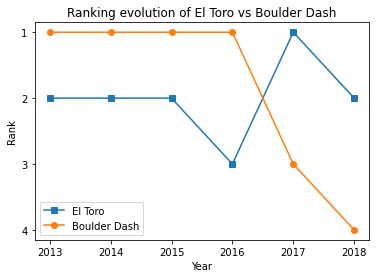

In [7]:
comp_two_rank_evolutions(rc, rc, 'El Toro', 'Boulder Dash', 'Six Flags Great Adventure', 'Lake Compounce')

### **Function to compare the evolution of the top n ranked for roller coasters over time**

In [8]:
def comp_top_rank_evolutions(df, n):
    # df = dataframe to use
    # n = lowest ranking accepted to select the roller coaster
    
    # create an extra column to identify roller coasters by combining name and park
    df['Name_Park'] = df['Name'] + ' (' + df['Park'] + ')'

    # select the roller costers based on their best rank, observations with rank above n are excluded (i.e. "bad" ranking)
    top_n = df[['Name_Park', 'Rank', 'Year of Rank']][df['Rank'] <= n]
    
    # create a list of the unique roller coasters retained
    top_n_rc = top_n['Name_Park'].unique()
    
    # chart parameters
    xlenght = range(len(top_n['Year of Rank'].unique()))
    xticks_labels = np.sort(top_n['Year of Rank'].unique())
    ylenght = range(min(top_n['Rank']), max(top_n['Rank']) + 1)
    if str(df) == 'wrc':
        title = 'Evolution of the top {n} ranked roller coasters made of wood'.format(n=n)
    else:
        title = 'Evolution of the top {n} ranked roller coasters made of steel'.format(n=n)
    
    # plot chart
    ax = plt.subplot()
    for rc in top_n_rc:
        year_x = top_n[top_n['Name_Park'] == rc]['Year of Rank']
        rank_y = top_n[top_n['Name_Park'] == rc]['Rank']
        ax.plot(range(len(year_x)), rank_y, marker='o', label=rc)
        ax.set_xticks(xlenght), ax.set_xticklabels(xticks_labels)
        ax.set_yticks(ylenght), ax.invert_yaxis(), 
        ax.legend(bbox_to_anchor = (1,1.03))
    
    plt.ylabel('Rank')
    plt.xlabel('Year\n\n (if a roller coaster was not ranked at the start of the period,\nit is not reported)')
    plt.title(title)
    plt.show()

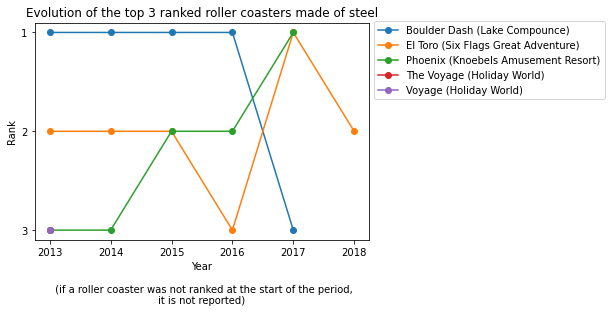

In [136]:
comp_top_rank_evolutions(wrc, 3)

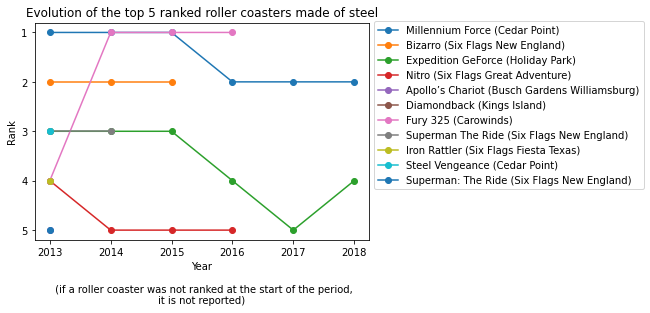

In [135]:
comp_top_rank_evolutions(src, 5)

# **Part II - EDA**

### **Import data (2)**

In [11]:
roller = pd.read_csv('roller_coasters.csv')

### **Check data**

In [12]:
roller.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


In [13]:
roller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


In [14]:
numf = ['speed', 'height', 'length', 'num_inversions']
catf = ['name', 'material_type', 'seating_type', 'manufacturer', 'park', 'status']

In [15]:
roller[numf].describe()

,speed,height,length,num_inversions
count,1478.000000,1667.000000,1675.000000,2405.000000
mean,70.102842,26.725855,606.147463,0.809563
std,28.338394,35.010166,393.840496,1.652254
min,0.000000,0.000000,-1.000000,0.000000
25%,47.000000,13.000000,335.000000,0.000000
50%,72.000000,23.000000,500.000000,0.000000
75%,88.000000,35.000000,839.000000,1.000000
max,240.000000,902.000000,2920.000000,14.000000


In [16]:
roller[catf].describe()

,name,material_type,seating_type,manufacturer,park,status
count,2799,2802,2802,2802,2802,2802
unique,2075,4,15,122,718,9
top,Dragon,Steel,Sit Down,na,Foire,status.operating
freq,26,2059,2217,307,121,2172


### **Quick transformation**

In [185]:
roller.status = roller.status.str.replace('status.', '').str.strip('.').str.replace('.', ' ').str.title()

In [186]:
roller.status.unique()

array(['Operating', 'Relocated', 'Closed Definitely', 'Retracked',
       'Closed Temporarily', 'Unknown', 'Construction', 'Announced',
       'Rumored'], dtype=object)

### **Function to plot any numerical data into an histogram**

In [162]:
def plot_hist(df, column, bins=25, remove_outliers=True):
    # df = dataframe to use
    # column = column to plot
    # bins = bins of the histogram, by default 25 if not precised when the function is called
    # remove_outliers = indicates if outliers must be removed from the data before plotting them, by default is True
    
    # check that the column passed to the function is numerical, if yes the function return an error message
    if df[column].dtypes != 'float' and df[column].dtypes != 'int64':
        error_message = 'The feature \'' + str(column) + '\' is not numerical.'
        return error_message

    # check if the outliers must be removed
    elif remove_outliers == True:
        
        # data for the chart 
        data_temp = df[column].dropna()
        q1 = np.quantile(data_temp, 0.25)
        q3 = np.quantile(data_temp, 0.75)
        iqr_15 = (q3 - q1) * 1.5
        data = data_temp[(data_temp >= (q1 - iqr_15)) & (data_temp <= (q3 + iqr_15))]
        
        # chart parameter(s)
        title = 'Roller coaster distribution by {column}'.format(column=column)
        
        # plot chart
        plt.hist(data, bins)
        plt.ylabel('Count')
        plt.xlabel('{column}\n\n(Outliers removed, total of {tot})'.format(column=column, tot=len(data)))
        plt.title(title)
        plt.show()
    
    else:
        # data for the chart 
        data = df[column].dropna()
        
        # chart parameter(s)
        title = 'Roller coaster distribution by {column}'.format(column=column)
        ylabel = 'Count (total={total})'.format(total=len(data))
        
        # plot chart
        plt.hist(data, bins)
        plt.ylabel('Count'), plt.xlabel(str(column))
        plt.title(title)
        plt.show()

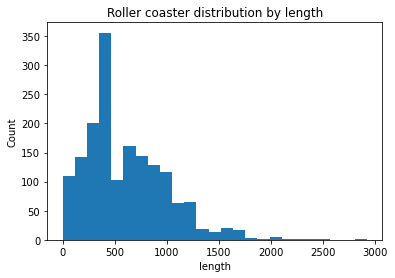

In [150]:
plot_hist(roller, 'length', remove_outliers=False)

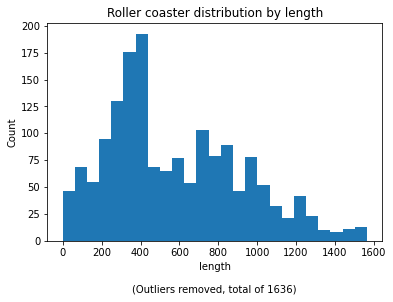

In [151]:
plot_hist(roller, 'length')

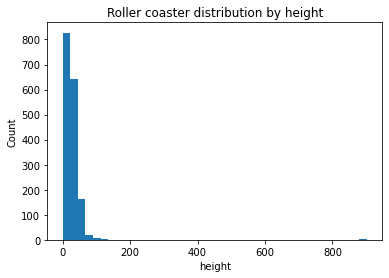

In [152]:
plot_hist(roller, 'height', bins=40, remove_outliers=False)

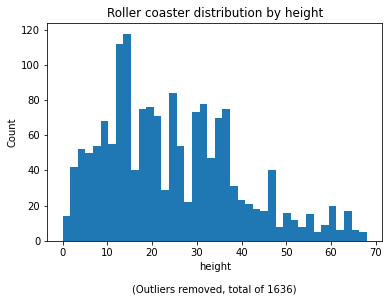

In [153]:
plot_hist(roller, 'height', bins=40)

### **Function to plot the number of inversions into a bar chart of all the roller coasters for a park**

This function aims to plot efficiently numerical discrete variables.

In [21]:
def plot_num_inversions_per_park(df, park, only_positive=False):
    # df = dataframe to use
    # park = name of the park where the roller coaster is located
    # only_positive = indicates if roller coasters without inversions must be excluded, by default is False 
    
        
    if only_positive == False:
        # data for the chart 
        data = df[['name', 'num_inversions']][df['park'] == park].sort_values('num_inversions', ascending=False)
        
        # chart parameter(s)
        yticks = range(int(min(data['num_inversions'])), int(max(data['num_inversions'])) + 1)
        title = 'Number of inversions per roller coaster for the park \'{park}\''.format(park=park)
        
        # plot chart
        ax = plt.subplot()
        plt.bar(data['name'], data['num_inversions'])
        plt.xticks(rotation=90)
        ax.set_yticks(yticks)
        plt.ylabel('Nbr of inversions')
        plt.title(title)
        plt.show()
    
    else:
        # data for the chart 
        data = df[['park', 'name', 'num_inversions']][
            (df['park'] == park) & 
            (df['num_inversions'] > 0)].sort_values('num_inversions', ascending=False)
        
        # chart parameter(s)
        yticks = range(int(min(data['num_inversions'])), int(max(data['num_inversions'])) + 1)
        title = 'Number of inversions per roller coaster for the park \'{park}\''.format(park=park)
        
        # plot chart       
        ax = plt.subplot()
        plt.bar(data['name'], data['num_inversions'])
        plt.xticks(rotation=90)
        ax.set_yticks(yticks)
        plt.ylabel('Nbr of inversions')
        plt.title(title)
        plt.show()

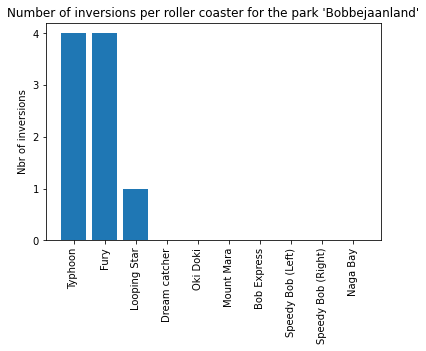

In [22]:
plot_num_inversions_per_park(roller, 'Bobbejaanland')

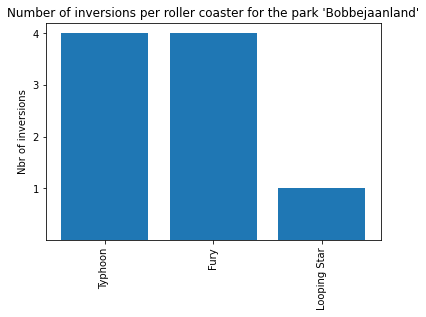

In [23]:
plot_num_inversions_per_park(roller, 'Bobbejaanland', only_positive=True)

### **Function to plot the number of inversions into a bar chart of all the roller coasters for a park**

Instead of writting a function to plot specifically the status 'Operating' and 'Definitely Closed', let's write a function to create a pie chart for any categorical variable, allowing to pass the options to plot for the variable selected.

In [246]:
def plot_catvar(df, var, options_list=False):
    # df = dataframe to use
    # var = variable to plot
    # options_list = list of options to consider from the variable to plot, by default False i.e. all options are plotted
    ## NOTE: if options_list remains 'False' and the number of options is to high, the pie chart will be impossible to read
    
    if options_list == False:
        data_temp = df[['name', var]]
        data = data_temp.groupby(var).name.count()
    
        # chart parameter(s)
        title = '\'{var}\' distribution'.format(var=var.replace('_', ' ').title())
        explode = np.ones(len(data))*.05
    
        # plot chart
        plt.pie(data, labels=data.index, autopct='%.1f%%', explode=explode, pctdistance=.8)
        plt.title(title)
        plt.show()
    
    else:       
        # data for the roller coaster chart
        data_temp = df[['name', var]][df[var].isin(options_list)]
        data = data_temp.groupby(var).name.count()
    
        # chart parameter(s)
        title = '\'{var}\' targeted distribution'.format(var=var.replace('_', ' ').title())
        explode = np.ones(len(options_list))*.05
    
        # plot chart
        plt.pie(data, labels=data.index, autopct='%.1f%%', explode=explode, pctdistance=.8)
        plt.title(title)
        plt.show()

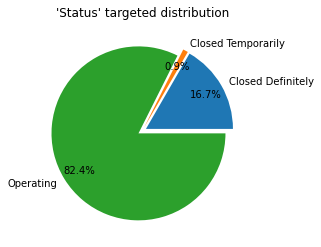

In [247]:
plot_catvar(roller, 'status', ['Operating', 'Closed Definitely', 'Closed Temporarily'])

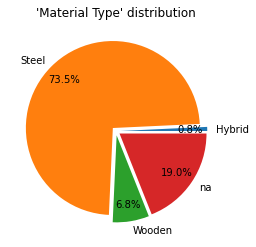

In [248]:
plot_catvar(roller, 'material_type')

### **Function to plot the relation between numercial data**

In [164]:
def numvar_relation(df, var1, var2, 
                    filer_min_var1=-5, filer_max_var1=False,
                    filer_min_var2=-5, filer_max_var2=False
                        ):
    
    # df = dataframe to use
    # var1 = variable to use for points coordinate on x axis
    # var2 = variable to use for points coordinate on y axis
    # filter_max/min_var1 = allow to precise the min/max value of x-axis to manually handle outliers 
    # filter_max/min_var2 = allow to precise the min/max value of y-axis to manually handle outliers
    # filter_max/min_var1/var2 = by default min=-5 and max=False
      
    # data for the chart
    v1 = df[var1]
    v2 = df[var2] 
    
    # chart parameter(s)
    title_raw = 'Relation between {var1} and {var2} (raw data).'.format(var1=var1, var2=var2)
    title_trimmed = 'Relation between {var1} and {var2} (trimmed data).'.format(var1=var1, var2=var2)
        
    # plot chart
    
    if (filer_max_var1 == False) or (filer_max_var2 == False) or (filer_max_var1 == False and filer_max_var2 == False):
        plt.scatter(v1, v2, edgecolors='white')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.xlim(filer_min_var1, max(v1)*1.1)
        plt.ylim(filer_min_var2, max(v2)*1.1)
        plt.title(title_raw)
        plt.show()
        
    else:
        plt.scatter(v1, v2, edgecolors='white')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.xlim(filer_min_var1, filer_max_var1)
        plt.ylim(filer_min_var2, filer_max_var2)
        plt.title(title_trimmed)        
        plt.show()   

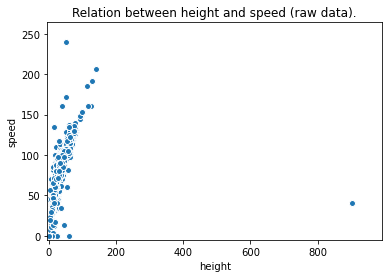

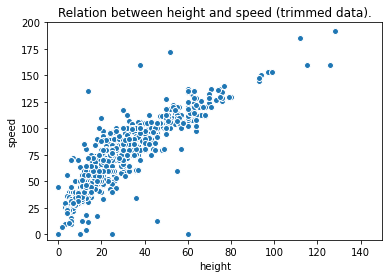

In [165]:
numvar_relation(roller, 'height', 'speed')
numvar_relation(roller, 'height', 'speed', filer_max_var1=150, filer_max_var2=200)

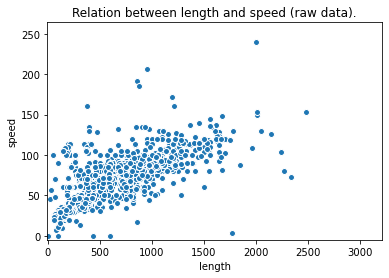

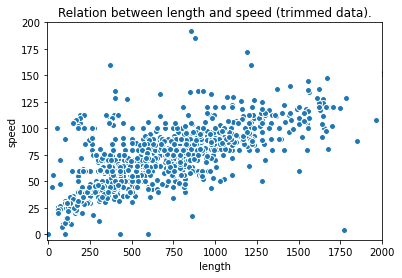

In [166]:
numvar_relation(roller, 'length', 'speed')
numvar_relation(roller, 'length', 'speed', filer_max_var1=2000, filer_max_var2=200)

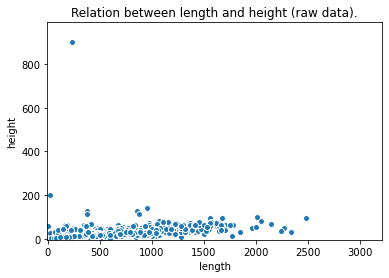

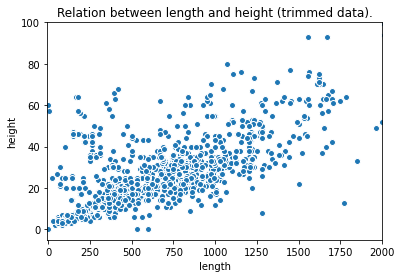

In [167]:
numvar_relation(roller, 'length', 'height')
numvar_relation(roller, 'length', 'height', filer_max_var1=2000, filer_max_var2=100)